In [ ]:
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/park_train.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/park_validation.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/park_test.data

File ‘park_train.data’ already there; not retrieving.

File ‘park_validation.data’ already there; not retrieving.

--2022-05-06 21:06:14--  https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/park_test.data
Resolving personal.utdallas.edu (personal.utdallas.edu)... 129.110.46.112
Connecting to personal.utdallas.edu (personal.utdallas.edu)|129.110.46.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10644 (10K)
Saving to: ‘park_test.data’

park_test.data      100%[===================>]  10.39K  --.-KB/s    in 0s      

2022-05-06 21:06:18 (122 MB/s) - ‘park_test.data’ saved [10644/10644]



# Problem 1

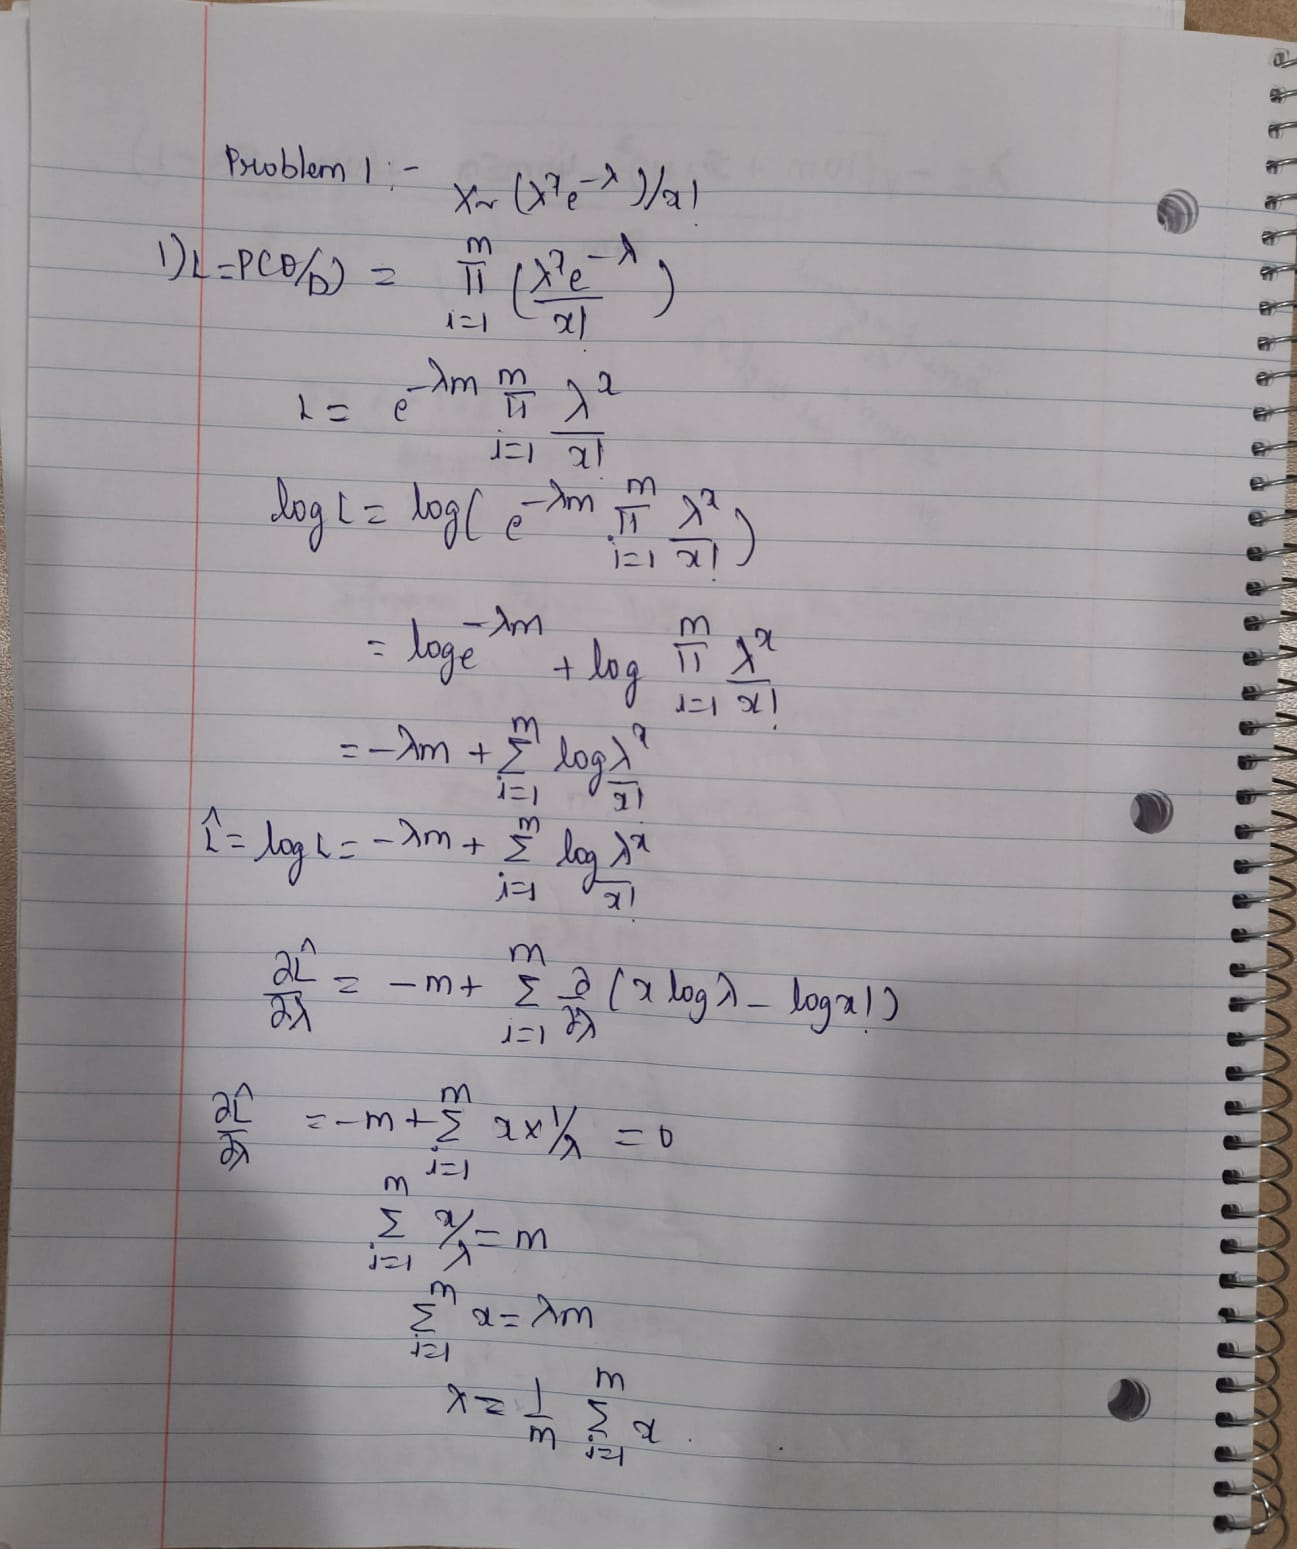

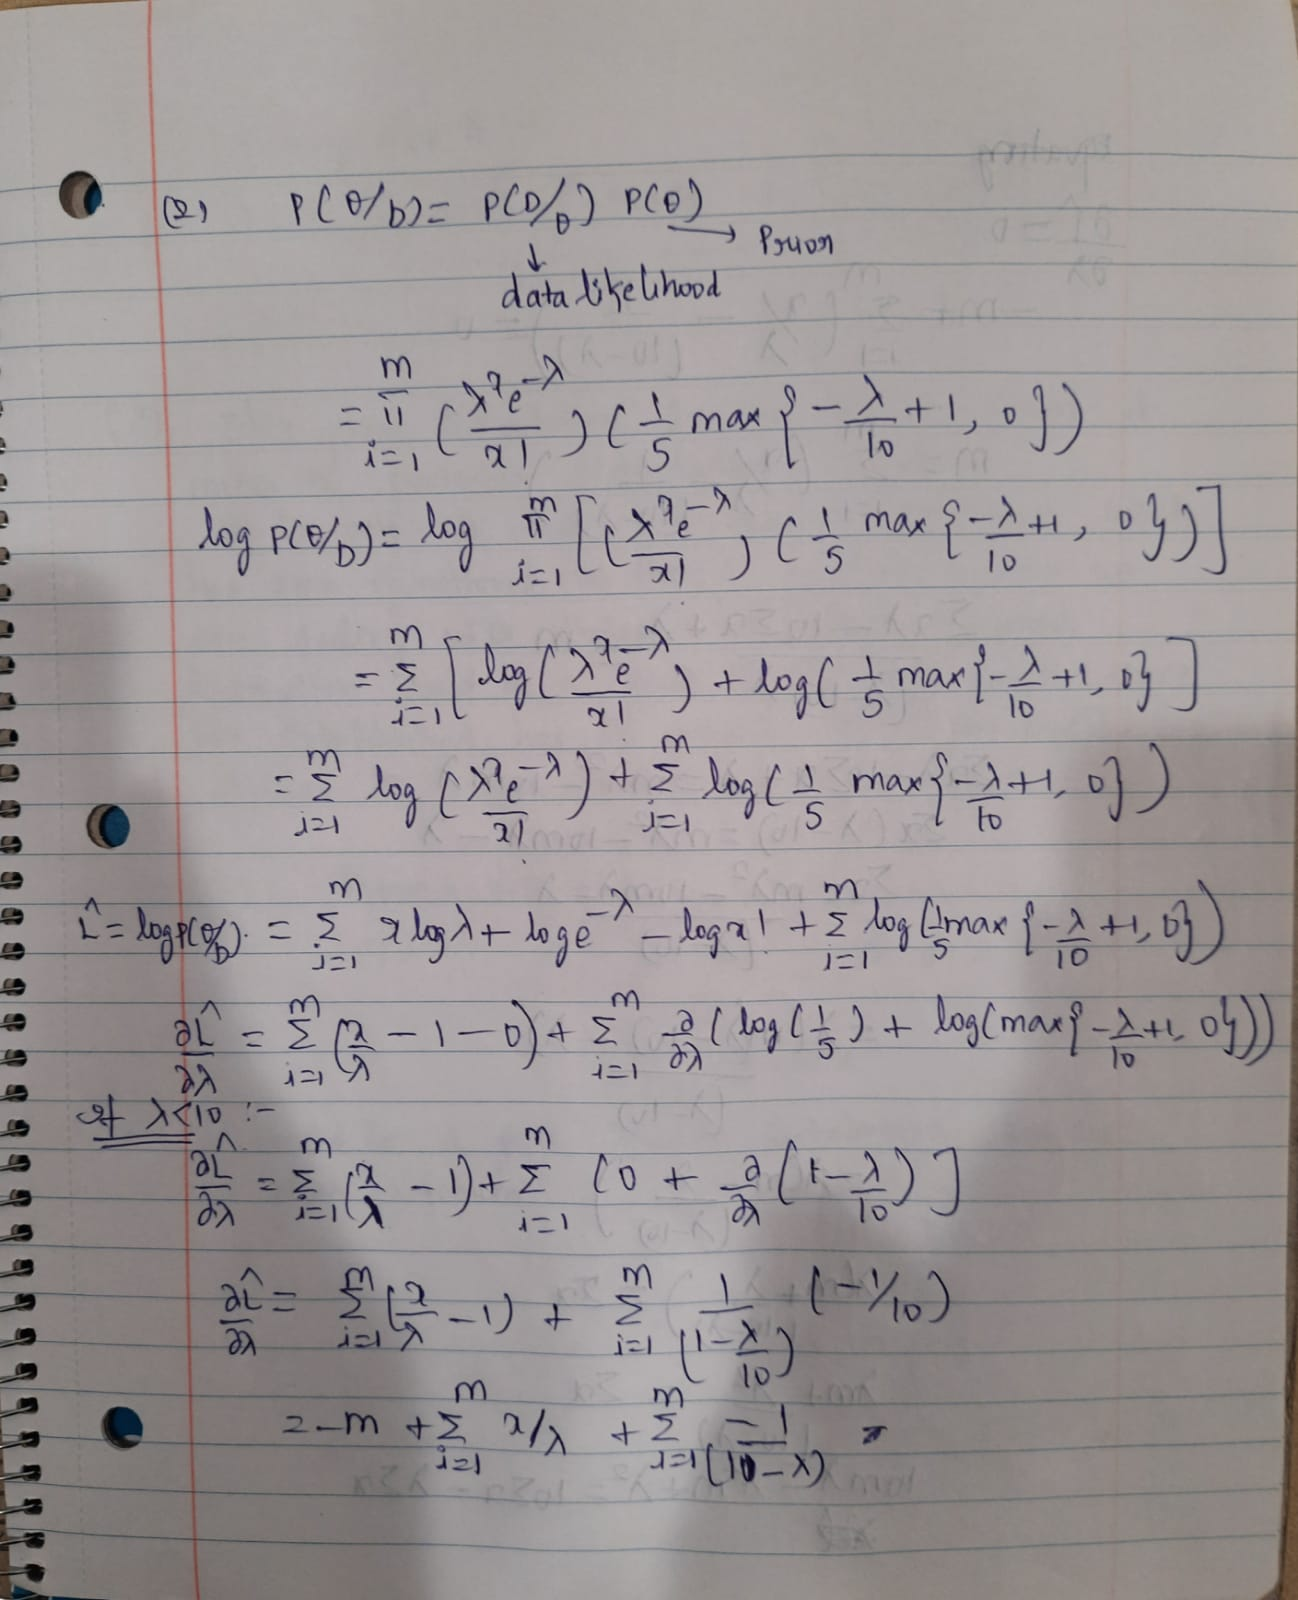

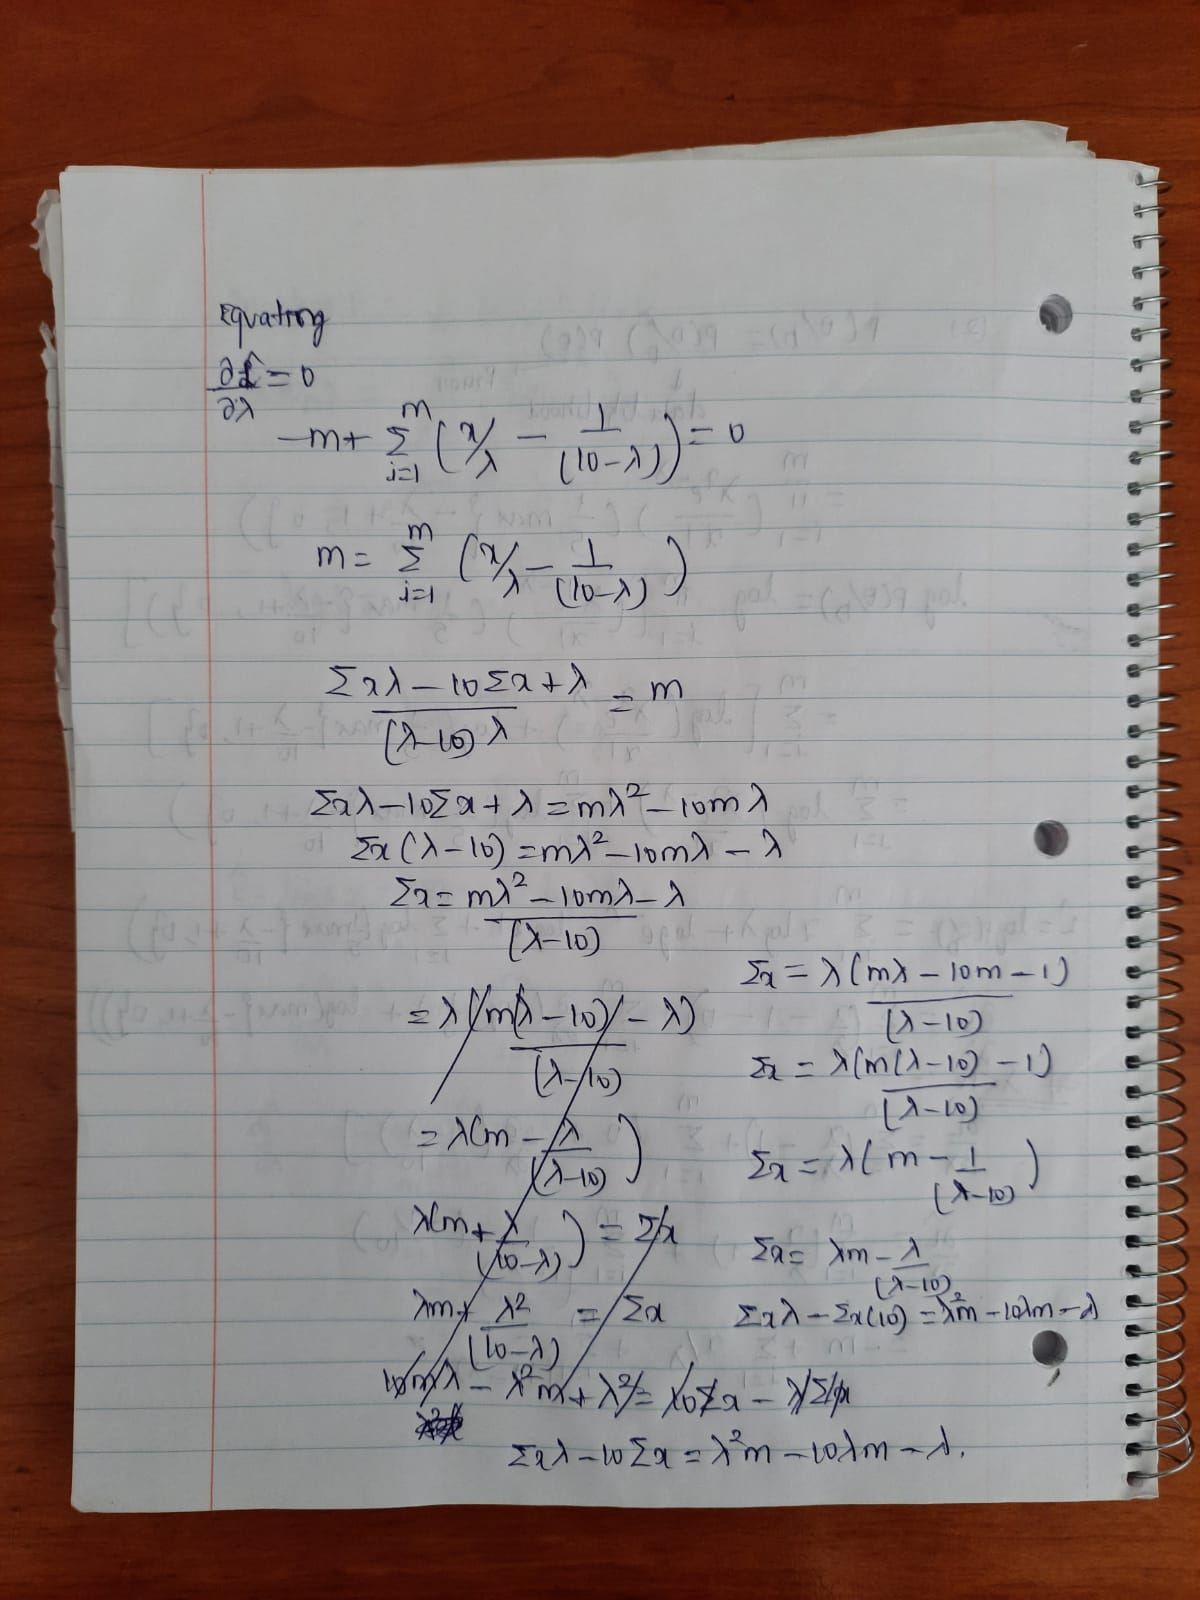

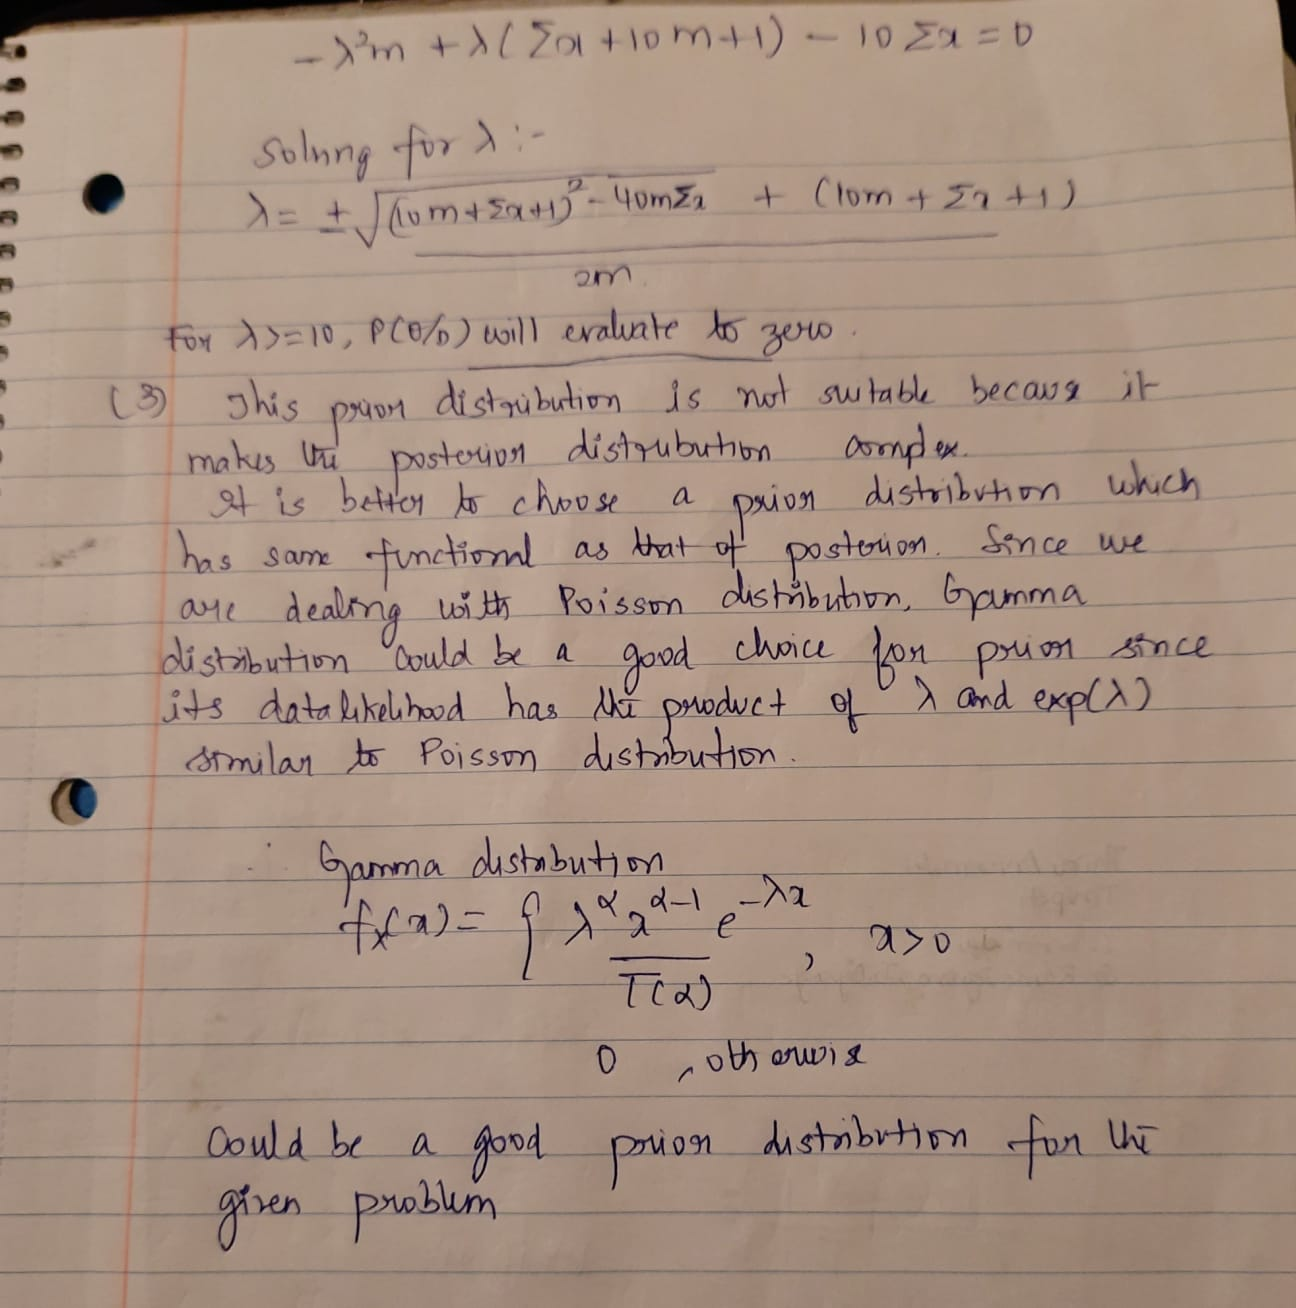

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!cd 'drive/MyDrive/ML_HW_4'

---
# 2)a) Logistic Regression Classifier

In [ ]:
import numpy as np
from collections import defaultdict
import pandas as pd
from copy import deepcopy

In [ ]:
park_data = np.genfromtxt('./park_train.data',delimiter=',')
num_samples = len(park_data)
Y = park_data[:,0]
Y = np.array(list(map(lambda x: 1 if x == 1 else -1, Y)))
X = park_data[:,1:]
Y = Y.reshape(-1,1)

In [ ]:
park_valid = np.genfromtxt('./park_validation.data',delimiter=',')
num_samples = len(park_valid)
Y_valid = park_valid[:,0]
Y_valid = np.array(list(map(lambda x: 1 if x == 1 else -1, Y_valid)))
X_valid = park_valid[:,1:]
Y_valid = Y_valid.reshape(-1,1)

In [ ]:
park_test = np.genfromtxt('./park_test.data',delimiter=',')
num_samples = len(park_test)
Y_test = park_test[:,0]
Y_test = np.array(list(map(lambda x: 1 if x == 1 else -1, Y_test)))
X_test = park_test[:,1:]
Y_test = Y_test.reshape(-1,1)

In [ ]:
def accuracy(X, Y, W, bias):
    M,N = X.shape
    Y_pred = np.dot(X, W) + bias
    Y_pred[Y_pred>=0] = 1
    Y_pred[Y_pred<0] = -1
    misclassifications =  np.sum(abs(Y-Y_pred))/2
    return (1- misclassifications/M)*100

In [ ]:
def logistic_train(X, Y, gamma):
    rows, cols = X.shape
    W = np.zeros(cols).reshape(cols,1)
    bias = 0
    iterations = 0
    current_likelihood = 0
    previous_likelihood = 0
    while True :
        previous_likelihood = current_likelihood
        linear_weight = np.dot(X,W) + bias
        exp_weight = np.exp(linear_weight)
        conditional_probability_pos = (exp_weight/(1+exp_weight))
        conditional_probability_neg = (1/(1+exp_weight))
        gradients_bias = ((0.5*(Y+1)) - conditional_probability_pos).sum()
        gradients_weights = np.sum(X*((0.5*(Y+1)) - conditional_probability_pos), axis=0).reshape(cols, 1)
        W = W + gamma * gradients_weights
        bias = bias + gamma * gradients_bias
        current_likelihood = np.sum(0.5 * (Y+1) * linear_weight - np.log(1 + np.exp(linear_weight)), axis=0)
        iterations = iterations + 1
        if iterations % 10000 == 0:
            print(iterations, gradients_bias, accuracy(X, Y, W, bias), current_likelihood-previous_likelihood, current_likelihood, previous_likelihood)
        if abs(current_likelihood-previous_likelihood) < 1e-7:
            break
        if iterations == 100000:
            break
    return (W, bias, iterations)

In [ ]:
best_W = None
best_bias = None
best_gamma = None
best_accuracy = 0
for i in range(-6, -4):
    gamma = 10**i
    print('Valid For alpha ', gamma)
    (W, bias, iterations) = logistic_train(X, Y, gamma)
    training_accuracy = accuracy(X, Y, W, bias)  
    current_accuracy = accuracy(X_valid, Y_valid, W, bias)
    print('Train Acc ', training_accuracy)
    print('Valid Acc ', current_accuracy)            
    print('W and bias in ', iterations, ' iterations')
    if current_accuracy > best_accuracy :
        best_accuracy = current_accuracy
        best_W = W
        best_bias = bias     
        best_gamma = gamma
    print('------------------------------------------------------------')

Valid For alpha  1e-06
10000 2.2959938139460156 78.2051282051282 [0.00013953] [-39.51398567] [-39.51412519]
20000 2.17958182418037 79.48717948717949 [0.00012354] [-38.20066373] [-38.20078728]
30000 2.073529674706194 79.48717948717949 [0.00010981] [-37.03563992] [-37.03574973]
40000 1.9758437490960477 80.76923076923077 [9.80089617e-05] [-35.99803675] [-35.99813475]
50000 1.8859496223740244 80.76923076923077 [8.78528867e-05] [-35.06999219] [-35.07008004]
60000 1.8032070007622554 82.05128205128204 [7.90879846e-05] [-34.23635524] [-34.23643433]
70000 1.7269650557241243 82.05128205128204 [7.14961276e-05] [-33.4843343] [-33.4844058]
80000 1.6565976215504277 82.05128205128204 [6.48930153e-05] [-32.80314733] [-32.80321223]
90000 1.5915222965177804 82.05128205128204 [5.91245215e-05] [-32.183701] [-32.18376013]
100000 1.5312088417599914 83.33333333333334 [5.40624687e-05] [-31.61830993] [-31.618364]
Train Acc  83.33333333333334
Valid Acc  75.86206896551724
W and bias in  100000  iterations
------

# Best Weight, Accuracy, Lambda and Bias

In [ ]:
best_W, best_bias, best_accuracy

(array([[ 8.02769188e-02],
        [-2.19232004e-02],
        [-5.95008546e-02],
        [ 3.25730232e-02],
        [ 2.64198422e-04],
        [ 2.09942241e-02],
        [ 2.05697882e-02],
        [ 6.29760790e-02],
        [ 2.24491340e-01],
        [ 2.16932606e+00],
        [ 1.21394581e-01],
        [ 1.35739066e-01],
        [ 1.72465594e-01],
        [ 3.64211734e-01],
        [ 1.53017910e-01],
        [ 2.52064939e-01],
        [ 1.11316354e+00],
        [ 1.41211180e+00],
        [ 2.95320051e+00],
        [ 1.00155283e+00],
        [ 5.51477553e+00],
        [ 1.22652710e+00]]), 1.4871128361754382, 79.3103448275862)

# Accuracy on Test Data

In [ ]:
test_accuracy = accuracy(X_test, Y_test, best_W, best_bias)
test_accuracy

74.57627118644068

When the data is completely separable, logistic regression tries to fit a step function to fit the data in the absence of regulatization.

Let's say we have two input columns (X1, X2) and one dependent column (Y). Let's say X1 completely separates the data Y into two classes -1 and 1.

What happens when we try to fit a logistic or a probit regression model of Y on X1 and X2? Mathematically the maximum likelihood estimate for X1 does not exist. In particular with this example, the larger the coefficient for X1, the larger the likelihood. In other words, the coefficient for X1 should be as large as it can be, which would be infinity.

To avoid this problem, we add regularization so that we change the separator function from a step function to a smoothened curve whose maximum likelihood estimate doesn't evaluate to infinity for perfectly separable data.

---
# 2) b) Logistic Regression Classifier with L1-Regularization




In [ ]:
def logistic_train_l1_reg(X, Y, gamma, lamb):
    rows, cols = X.shape
    W = np.zeros(cols).reshape(cols,1)
    bias = 0
    iterations = 0
    current_likelihood = 0
    previous_likelihood = 0
    while True :
        previous_likelihood = current_likelihood
        linear_weight = np.dot(X,W) + bias
        exp_weight = np.exp(linear_weight)
        conditional_probability_pos = exp_weight / (1+exp_weight)
        conditional_probability_neg = 1 / (1+exp_weight)
        current_likelihood = np.sum(0.5 * (Y+1) * linear_weight - np.log(1 + np.exp(linear_weight)), axis=0) - lamb * np.sum(abs(W), axis=0)
        gradients_bias = ((0.5*(Y+1)) - conditional_probability_pos).sum()
        lamb_der = deepcopy(W)
        lamb_der[lamb_der < 0] = -1
        lamb_der[lamb_der >= 0] = 1
        gradients_weights = np.sum(X*((0.5*(Y+1)) - conditional_probability_pos), axis=0).reshape(cols, 1) - lamb * lamb_der
        W = W + gamma * gradients_weights
        bias = bias + gamma * gradients_bias
        iterations = iterations + 1
        if iterations % 100000 == 0:
            print(iterations, gradients_bias, accuracy(X, Y, W, bias), current_likelihood-previous_likelihood, current_likelihood, previous_likelihood)
        if abs(current_likelihood-previous_likelihood) < 1e-4:
            break
        if iterations == 1000000:
            break
    return (W, bias, iterations)

In [ ]:
best_W = None
best_bias = None
best_gamma = None
best_lambda = None
best_accuracy = 0
for i in range(-6, -4):
    for j in range(-6, 5):
        lamb = 10 ** j
        gamma = 10 ** i
        print('valid for step size:', gamma, 'lambda:', lamb)
        (W, bias, iterations) = logistic_train_l1_reg(X, Y, gamma, lamb)
        training_accuracy = accuracy(X, Y, W, bias)  
        current_accuracy = accuracy(X_valid, Y_valid, W, bias)
        print('train acc ', training_accuracy)
        print('valid acc ', current_accuracy)
        print('W and bias in ', iterations, ' iterations')
        if current_accuracy > best_accuracy :
            best_accuracy = current_accuracy
            best_W = W
            best_bias = bias     
            best_gamma = gamma
            best_lambda = lamb
        print('------------------------------------------------------------')

valid for step size: 1e-06 lambda: 1e-06
train acc  80.76923076923077
valid acc  72.41379310344827
W and bias in  38204  iterations
------------------------------------------------------------
valid for step size: 1e-06 lambda: 1e-05
train acc  80.76923076923077
valid acc  72.41379310344827
W and bias in  38204  iterations
------------------------------------------------------------
valid for step size: 1e-06 lambda: 0.0001
train acc  80.76923076923077
valid acc  72.41379310344827
W and bias in  38201  iterations
------------------------------------------------------------
valid for step size: 1e-06 lambda: 0.001
train acc  80.76923076923077
valid acc  72.41379310344827
W and bias in  38170  iterations
------------------------------------------------------------
valid for step size: 1e-06 lambda: 0.01
train acc  80.76923076923077
valid acc  72.41379310344827
W and bias in  37871  iterations
------------------------------------------------------------
valid for step size: 1e-06 lambda: 

# Best Weight, Bias, Step Size and Lambda:

In [ ]:
best_W, best_bias, best_accuracy, best_lambda, best_gamma

(array([[-0.00988762],
        [ 0.00148304],
        [-0.0055587 ],
        [-0.00933074],
        [ 0.00039837],
        [-0.00902741],
        [-0.00993382],
        [-0.00709817],
        [ 0.00200099],
        [ 0.00803094],
        [-0.00780198],
        [-0.00443317],
        [-0.00744634],
        [-0.00338719],
        [-0.00566799],
        [-0.00725386],
        [-0.00273584],
        [ 0.00035975],
        [ 0.00528348],
        [ 0.003316  ],
        [ 0.0010028 ],
        [-0.00038837]]), 2.6623878067499795, 84.48275862068965, 10000, 1e-06)

# Accuracy on Test Data

In [ ]:
test_accuracy_l1 = accuracy(X_test, Y_test, best_W, best_bias)
test_accuracy

74.57627118644068

---
# 2) c) Logistic Regression Classifier with L2-Regularization


In [ ]:
def logistic_train_l2_reg(X, Y, gamma, lamb):
    rows, cols = X.shape
    W = np.zeros(cols).reshape(cols,1)
    bias = 0
    iterations = 0
    current_likelihood = 0
    previous_likelihood = 0
    while True :
        previous_likelihood = current_likelihood
        linear_weight = np.dot(X,W) + bias
        exp_weight = np.exp(-1 * linear_weight)
        conditional_probability_neg = exp_weight / (1+exp_weight)
        conditional_probability_pos = 1 / (1+exp_weight)
        gradients_bias = ((0.5*(Y+1)) - conditional_probability_pos).sum()
        lamb_der = W
        gradients_weights = np.sum(X*((0.5*(Y+1)) - conditional_probability_pos), axis=0).reshape(cols, 1) - lamb * lamb_der
        current_likelihood = np.sum(0.5 * (Y+1) * linear_weight - np.log(1 + np.exp(linear_weight)), axis=0) - (lamb)*np.sum(W**2,axis=0)
        W = W + gamma * gradients_weights
        bias = bias + gamma * gradients_bias
        iterations = iterations + 1
        if iterations % 10000 == 0:
            print(iterations, gradients_bias, accuracy(X, Y, W, bias), current_likelihood-previous_likelihood, current_likelihood, previous_likelihood)
        if abs(current_likelihood-previous_likelihood) < 1e-4:
            break
        if iterations == 100000:
            break
    return (W, bias, iterations)

In [ ]:
best_W = None
best_bias = None
best_gamma = None
best_lamb = None
best_accuracy = 0
for i in range(-6, -4):
    for j in range(-6, 5):
        lamb = 10**j
        gamma = 10**i
        print('valid for step size ', gamma, 'regularization lambda term:', lamb)
        (W, bias, iterations) = logistic_train_l2_reg(X, Y, gamma, lamb)
        training_accuracy = accuracy(X, Y, W, bias)  
        current_accuracy = accuracy(X_valid, Y_valid, W, bias)
        print('train acc ', training_accuracy)
        print('valid acc ', current_accuracy)            
        print('W and bias in ', iterations, ' iterations')
        if current_accuracy > best_accuracy :
            best_accuracy = current_accuracy
            best_W = W
            best_bias = bias     
            best_gamma = gamma
            best_lambda = lamb
        print('------------------------------------------------------------')

valid for step size  1e-06 regularization lambda term: 1e-06
10000 2.2959938163520697 78.2051282051282 [0.00013953] [-39.51398569] [-39.51412522]
20000 2.179581828168038 79.48717948717949 [0.00012354] [-38.20066382] [-38.20078736]
30000 2.0735296810763524 79.48717948717949 [0.00010981] [-37.03564008] [-37.03574989]
train acc  80.76923076923077
valid acc  72.41379310344827
W and bias in  38204  iterations
------------------------------------------------------------
valid for step size  1e-06 regularization lambda term: 1e-05
10000 2.295993838006562 78.2051282051282 [0.00013953] [-39.51398592] [-39.51412544]
20000 2.179581864057038 79.48717948717949 [0.00012354] [-38.20066456] [-38.2007881]
30000 2.0735297384077387 79.48717948717949 [0.00010981] [-37.0356416] [-37.03575141]
train acc  80.76923076923077
valid acc  72.41379310344827
W and bias in  38204  iterations
------------------------------------------------------------
valid for step size  1e-06 regularization lambda term: 0.0001
100

# Best Weight, Bias, Accuracy, Lambda and Step Size:

In [ ]:
best_W, best_bias, best_accuracy, best_gamma, best_lambda

(array([[ 7.56910423e-02],
        [-2.88686400e-02],
        [-6.18910730e-02],
        [ 3.12422129e-02],
        [ 2.53560356e-04],
        [ 2.01093733e-02],
        [ 1.97256138e-02],
        [ 6.03217866e-02],
        [ 2.14964545e-01],
        [ 2.07658492e+00],
        [ 1.16217727e-01],
        [ 1.30025301e-01],
        [ 1.65204982e-01],
        [ 3.48679991e-01],
        [ 1.46681443e-01],
        [ 2.46875626e-01],
        [ 1.07071070e+00],
        [ 1.35430156e+00],
        [ 2.83074827e+00],
        [ 9.60710932e-01],
        [ 5.29336688e+00],
        [ 1.17693652e+00]]), 1.5120080127656736, 84.48275862068965, 1e-05, 0.1)

# Accuracy on Test Data

In [ ]:
test_accuracy_l2 = accuracy(X_test, Y_test, best_W, best_bias)

In [ ]:
test_accuracy_l2

83.05084745762711

---
# 2) d)

L1 produce spoarser weights when compared to L2.

Weight update in Logistic Regression Classifier with L1 Regularizer produce sparser weights since weights are reduced by lambda value whereas in Logistic Regression Classifier with L2 Regularizer will reduce the weight by (lambda * weight).

Since W values usually lie between (-1 to 1), weights in L1 regularization are reduced by greater value and hence they produce sparser weights.

----